In [1]:
import matplotlib.pyplot as plt
import csv
from textblob import TextBlob
import pandas 
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer , TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report , f1_score , accuracy_score , confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[:5]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though"]

In [6]:
for message_no , message in enumerate(messages[:10]):
    print(message_no, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [7]:
messages = pandas.read_csv("SMSSpamCollection" , sep = '\t' , quoting = csv.QUOTE_NONE,
                          names = ["label" , "message"])
print(messages)

     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...
10     ham  I'm gonna be home soon and i don't want to tal...
11    spam  SIX chances to win CASH! From 100 to 20,000 po...
12    spam  URGENT! You have won a 1 week FREE membership ...
13     ham  I've been searching for the right words to tha...
14     ham                I HAVE A DATE ON SUNDAY WITH WILL!!
15    sp

In [8]:
print("Aggregate statistics of messages")
print(messages.groupby('label').describe())


Aggregate statistics of messages
      message                                                               
        count unique                                                top freq
label                                                                       
ham      4827   4518                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4


In [9]:
print("length of initial few messages : ")
messages['length'] = messages['message'].map(lambda text : len(text))
print(messages.head())


length of initial few messages : 
  label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61


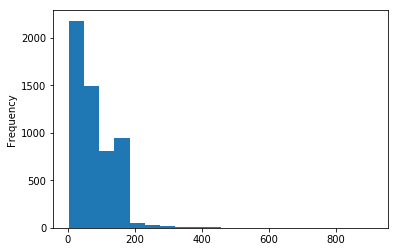

In [10]:
messages.length.plot(bins=20,kind = 'hist')

In [11]:
print("Aggrerate info about LENGTH of messages :")
print(messages.length.describe())

Aggrerate info about LENGTH of messages :
count    5574.000000
mean       80.478292
std        59.848302
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64


In [12]:
print("Print a message longer than 900 characters long :")
print(list(messages.message[messages.length > 900]))

Print a message longer than 900 characters long :
["For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C276D8278>,
      dtype=object)

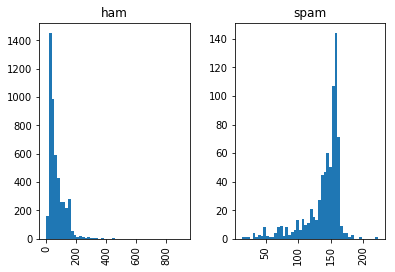

In [13]:
messages.hist(column = 'length' , by = 'label' , bins = 50)

In [14]:
def split_into_tokens(message):
    return TextBlob(message).words

In [15]:
print("Initial few messages again :")
print(messages.message.head())

# and here same message , tokenized
print("Tokenized messages :")
print(messages.message.head().apply(split_into_tokens))

Initial few messages again :
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object
Tokenized messages :
0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, do, n't, think, he, goes, to, usf, he...
Name: message, dtype: object


In [16]:
print("Word, Part of speech POS tag for sentence 'Hello world , how is it going?' :")
print()
print(TextBlob("Hello world , how is it going?").tags)

Word, Part of speech POS tag for sentence 'Hello world , how is it going?' :

[('Hello', 'NNP'), ('world', 'NN'), ('how', 'WRB'), ('is', 'VBZ'), ('it', 'PRP'), ('going', 'VBG')]


In [17]:
print("Word, part of Speech POS tag for sentence 'Hello world , how is it going ?' :")
print()
print(TextBlob("Hello world, how is it going ").tags)
print()

Word, part of Speech POS tag for sentence 'Hello world , how is it going ?' :

[('Hello', 'NNP'), ('world', 'NN'), ('how', 'WRB'), ('is', 'VBZ'), ('it', 'PRP'), ('going', 'VBG')]



In [18]:
def split_into_lemmas(message):
    message =unicode(message).lower()
    words = TextBlob(message).words
    return[word.lemma for word in words]

In [19]:
print("After lemmatization , the messages are :")
print()
print(messages.message.head())
print()
print(messages.message.head().apply(split_into_lemmas))
print()

After lemmatization , the messages are :

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, do, n't, think, he, go, to, usf, he, ...
Name: message, dtype: object



In [20]:
print("Data to vectors - Convert the messsages to a matrix of token counts")
bow_transformer = CountVectorizer(analyzer = split_into_lemmas).fit(messages['message'])

print(len(bow_transformer.vocabulary_))

Data to vectors - Convert the messsages to a matrix of token counts
8857


In [21]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
print("take one particular text message :")
print()
message4 = messages['message'][3]
print(message4)
print()

take one particular text message :

U dun say so early hor... U c already then say...



In [24]:
print("After Bag of words and conversion to vector , above text message :")
print()
bow4 = bow_transformer.transform([message4])
print(bow4)
print()
print("Shape of bag of words :")
print()
print(bow4.shape)
print()





After Bag of words and conversion to vector , above text message :

  (0, 1156)	1
  (0, 1895)	1
  (0, 2891)	1
  (0, 2921)	1
  (0, 4015)	1
  (0, 6724)	2
  (0, 7099)	1
  (0, 7685)	1
  (0, 8000)	2

Shape of bag of words :

(1, 8857)



In [27]:
print("Sanity check : what are these words that appear twice :")
print()
print(bow_transformer.get_feature_names()[8000])
print(bow_transformer.get_feature_names()[6724])
print(bow_transformer.get_feature_names()[7685])
print(bow_transformer.get_feature_names()[1156])
print()

Sanity check : what are these words that appear twice :

u
say
then
already



In [32]:
print("Using the bag of words tranformer , transform all in the messages :")
messages_bow = bow_transformer.transform(messages['message'])
print()
print('sparse matrix  shape :  ' , messages_bow.shape)
print('number of non-zeros :' , messages_bow.nnz)
print(messages_bow.shape[0])
print(messages_bow.shape[1])
print('sparsity :  %.2f%% ' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))
print()

Using the bag of words tranformer , transform all in the messages :

sparse matrix  shape :   (5574, 8857)
number of non-zeros : 80340
5574
8857
sparsity :  0.16% 



In [34]:
print("Now perform TFIDF fit and transform")
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print("After TFIDF fit and transfomation , above text message :")
print()
print(tfidf4)
print()


Now perform TFIDF fit and transform
After TFIDF fit and transfomation , above text message :

  (0, 8000)	0.30500390244920195
  (0, 7685)	0.22530830435091123
  (0, 7099)	0.19139747787841085
  (0, 6724)	0.5233907074133691
  (0, 4015)	0.4563719925781256
  (0, 2921)	0.329688073969027
  (0, 2891)	0.30370462627268274
  (0, 1895)	0.24665241656533501
  (0, 1156)	0.27494440163841516



In [36]:
print("What is the IDF (inverse  document frequency )of the word 'u' ? of word 'university'?:")
print()
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])
print()
#ignore words frequency less than 3.0 or 4..0

What is the IDF (inverse  document frequency )of the word 'u' ? of word 'university'?:

2.8495406039561364
8.239753235208429



In [39]:
print("Transfom the entire bag-of-words corpus into TF-IDF corpus at once :")
messages_tfidf = tfidf_transformer.transform(messages_bow)
print("After TFIDF tranfromation , print shape")
print()
print(messages_tfidf.shape)
print()

Transfom the entire bag-of-words corpus into TF-IDF corpus at once :
After TFIDF tranfromation , print shape

(5574, 8857)



In [41]:
print("Now perform MultinomialNB fit to get the Spam Detector")
spam_detector = MultinomialNB().fit(messages_tfidf, messages['label'])
print()

Now perform MultinomialNB fit to get the Spam Detector



In [42]:
print("lets use this spam detector to try to classify our single random message :")
print()
print('predicted :',spam_detector.predict(tfidf4)[0])
print('expected' , messages.label[3])

lets use this spam detector to try to classify our single random message :

predicted : ham
expected ham


In [43]:
spam_detector.predict(tfidf4)[0]

'ham'

In [44]:
all_predictions = spam_detector.predict(messages_tfidf)
print('print all predictons : ')
print()
print(all_predictions)

print all predictons : 

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [45]:
print('accuracy of spam predictions' , accuracy_score(messages['label'], all_predictions))
print()
print('confusion matrix\n',confusion_matrix(messages['label'],all_predictions))
print('(row=expected,col=predicted)')
print()

accuracy of spam predictions 0.9695012558306423

confusion matrix
 [[4827    0]
 [ 170  577]]
(row=expected,col=predicted)



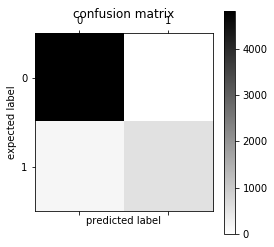

In [47]:
plt.matshow(confusion_matrix(messages['label'],all_predictions),
            cmap = plt.cm.binary, interpolation = 'nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

In [50]:
print("From this connfusion matrix , we can compute precision and recall,or their combination (harmonic mean)F1")
print()
print(classification_report(messages['label'], all_predictions))
print()

From this connfusion matrix , we can compute precision and recall,or their combination (harmonic mean)F1

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      4827
        spam       1.00      0.77      0.87       747

   micro avg       0.97      0.97      0.97      5574
   macro avg       0.98      0.89      0.93      5574
weighted avg       0.97      0.97      0.97      5574


